# Experiment 9
# Aim:  Implement Recurrent Neural Network/LSTM using Keras and TensorFlow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
# Increasing vocab size to 20,000 most frequent words and review length to 250 words
vocab_size = 20000
max_len = 250

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding the sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 159s 9us/step


# Building LSTM Model

In [4]:
# Build the model with Bidirectional LSTM and increased capacity
model = Sequential()

# Embedding layer
model.add(Embedding(vocab_size, 128, input_length=max_len))

# Spatial dropout to prevent overfitting
model.add(SpatialDropout1D(0.3))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the Model for More Epochs

In [5]:
# Train the model with more epochs and smaller batch size
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 247s 622ms/step - accuracy: 0.6658 - loss: 0.5857 - val_accuracy: 0.7435 - val_loss: 0.5159
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 254s 650ms/step - accuracy: 0.7863 - loss: 0.4596 - val_accuracy: 0.8342 - val_loss: 0.4082
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 254s 650ms/step - accuracy: 0.8748 - loss: 0.3139 - val_accuracy: 0.8430 - val_loss: 0.3860
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 286s 731ms/step - accuracy: 0.8943 - loss: 0.2662 - val_accuracy: 0.8322 - val_loss: 0.3992
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 269s 688ms/step - accuracy: 0.9102 - loss: 0.2394 - val_accuracy: 0.8455 - val_loss: 0.3791
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 275s 703ms/step - accuracy: 0.9277 - loss: 0.1953 - val_accuracy: 0.8345 - val_loss: 0.4256
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 661ms/step - accuracy: 0.9420 - loss: 0.1594 - val_accuracy: 0.8424 - val_loss: 0.4671
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 264s 674ms/step - accuracy: 0.9522 -

# Evaluate the Model on Training and Testing Data

In [ ]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
print(f'Training Accuracy: {train_acc:.4f}')

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9903 - loss: 0.0343
Training Accuracy: 0.9910
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8532 - loss: 0.5193
Test Accuracy: 0.8534


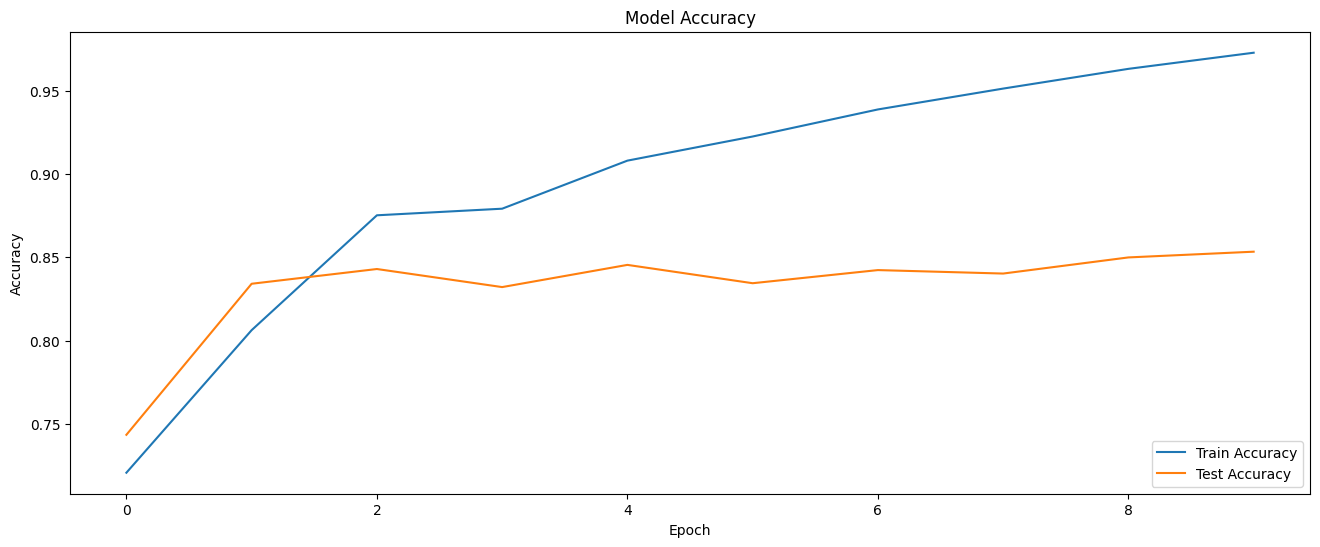

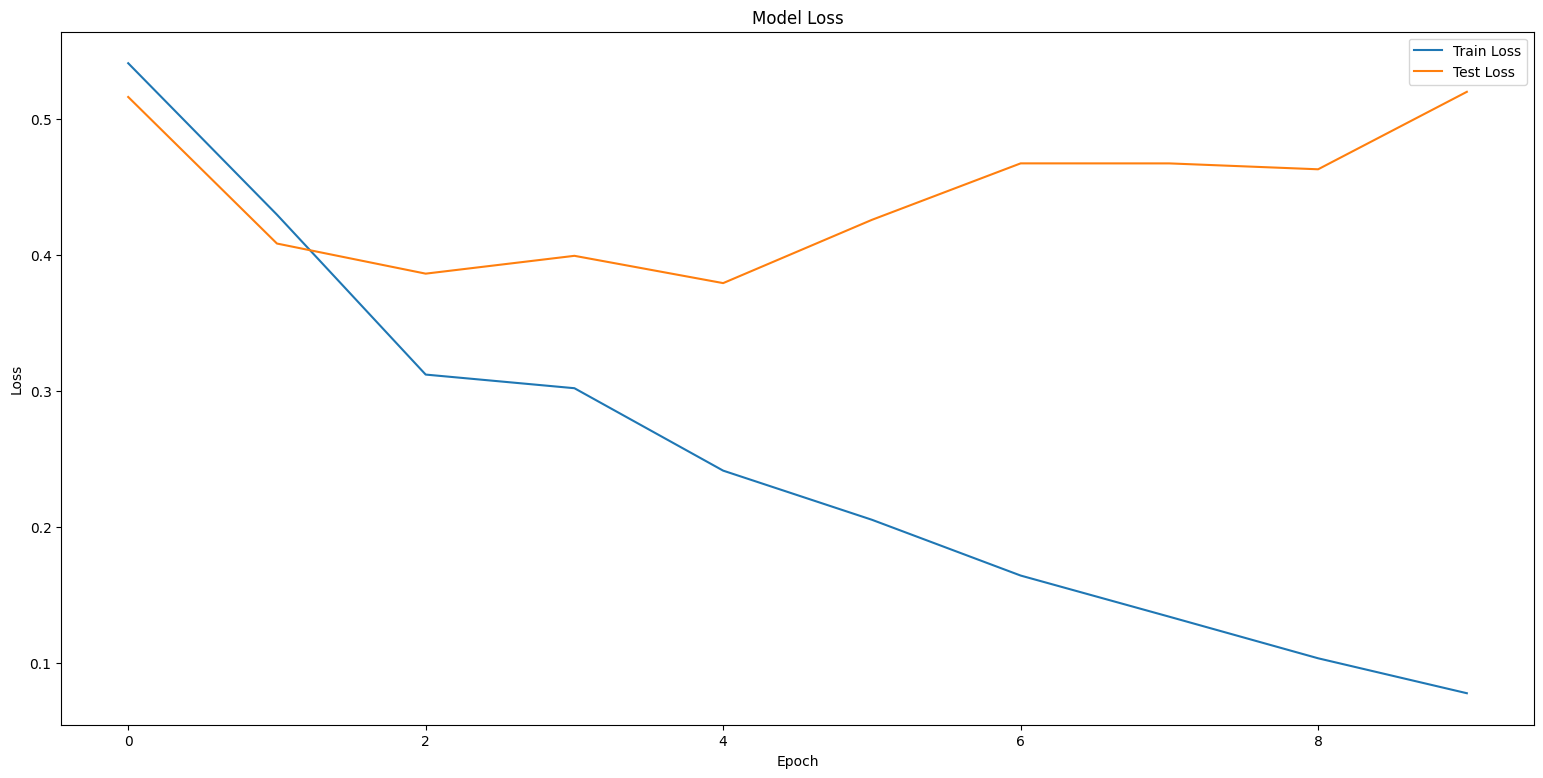

In [19]:
# You can also visualize the training process if needed:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(19,9))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Peform Prediction on Test Data

In [16]:
# Step 5: Perform Predictions on Test Data
y_pred_prob = model.predict(X_test)  # Predict probabilities for test data

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Display the first 10 predictions and their corresponding actual labels
for i in range(10):
    print(f'Predicted: {y_pred[i][0]}, Actual: {y_test[i]}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1


# By IT154 Ashish Vinod